# Departamento de Recursos Humanos

## Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- Cálculo de salário: https://www.mom.gov.sg
- Stock: https://www.moneyunder30.com

Educação
1 'Abaixo da faculdade'
2 'Faculdade'
3 'Bacharelado'
4 'Mestre'
5 'Doutor'

Satisfação Ambiental
1 'Baixa'
2 'Média'
3 'Alta'
4 'Muito Alta'

Envolvimento no Trabalho
1 'Baixo'
2 'Médio'
3 'Alto'
4 'Muito Alto'

Satisfação no Trabalho
1 'Baixa'
2 'Média'
3 'Alta'
4 'Muito Alta'

Classificação de Desempenho
1 'Baixo'
2 'Bom'
3 'Excelente'
4 'Excelente'

RelacionamentoSatisfação
1 'Baixa'
2 'Média'
3 'Alta'
4 'Muito Alta'

WorkLifeBalance
1 'Ruim'
2 'Bom'
3 'Melhor'
4 'Melhor'

 Age:....................................... Idade        
 Attrition:................................. Saiu    
 BusinessTravel:............................ Viagem de negócios    
 DailyRate:................................. Diária    
 Department:................................ Departamento    
 DistanceFromHome:.......................... Distância de casa    
 Education:................................. Educação    
 EducationField:............................ Campo da educação    
 EmployeeCount:............................. Contagem de funcionários    
 EmployeeNumber:............................ Número de empregado    
 EnvironmentSatisfaction:................... Satisfação Ambiental    
 Gender:..................................... Gênero    
 HourlyRate:................................. Taxa horária    
 JobInvolvement:............................. Envolvimento no Trabalho    
 JobLevel:................................... Nível de emprego    
 JobRole:.................................... Cargo de Trabalho    
 JobSatisfaction:............................ Satisfação no Trabalho    
 MaritalStatus:............................... Estado civil    
 MonthlyIncome:............................... Renda Mensal    
 MonthlyRate:................................. Taxa Mensal    
 NumCompaniesWorked:.......................... NumCompaniesWorked    
 Over18:...................................... Mais de 18    
 OverTime:.................................... Ao longo do tempo    
 PercentSalaryHike:........................... PorcentagemSalárioCaminhada    
 PerformanceRating:........................... Classificação de desempenho    
 RelationshipSatisfaction:.................... RelacionamentoSatisfação    
 StandardHours:............................... Horas padrão    
 StockOptionLevel:............................ Nível de opção de estoque    
 TotalWorkingYears:........................... Total de anos de trabalho    
 TrainingTimesLastYear:....................... Tempos de treinamentoÚltimo ano    
 WorkLifeBalance:............................. WorkLifeBalance    
 YearsAtCompany:.............................. AnosNaEmpresa    
 YearsInCurrentRole:.......................... Anos na função atual    
 YearsSinceLastPromotion:..................... AnosDesdeÚltimaPromoção    
 YearsWithCurrManager:........................ AnosComCurrManager
    


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import findspark, pyspark

from pyspark.sql               import SparkSession
from pyspark.sql.functions     import isnan, when, count, col
from pyspark.ml                import Pipeline
from pyspark.ml.feature        import RFormula, VectorAssembler, Binarizer, Normalizer, OneHotEncoder, StringIndexer, MinMaxScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation     import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.regression     import RandomForestRegressor

findspark.init()
spark = SparkSession.builder.appName("pipeline").getOrCreate()

In [2]:
rh = spark.read.csv("Human_Resources.csv", header=True, inferSchema=True, sep=",")
rh.show(3,truncate=False)

+---+---------+-----------------+---------+----------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+---------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel   |DailyRate|Department            |DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole              |JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLife

In [3]:
rh.select([count(when(isnan(c), c)).alias(c) for c in rh.columns]).show(truncate=False)

+---+---------+--------------+---------+----------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+-------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
|Age|Attrition|BusinessTravel|DailyRate|Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBalance|YearsAtCompany|YearsInCurrentRole|YearsSinceLastPr

In [4]:
rh.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Attrition: string (nullable = true)
 |-- BusinessTravel: string (nullable = true)
 |-- DailyRate: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- DistanceFromHome: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- EducationField: string (nullable = true)
 |-- EmployeeCount: integer (nullable = true)
 |-- EmployeeNumber: integer (nullable = true)
 |-- EnvironmentSatisfaction: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- HourlyRate: integer (nullable = true)
 |-- JobInvolvement: integer (nullable = true)
 |-- JobLevel: integer (nullable = true)
 |-- JobRole: string (nullable = true)
 |-- JobSatisfaction: integer (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- MonthlyIncome: integer (nullable = true)
 |-- MonthlyRate: integer (nullable = true)
 |-- NumCompaniesWorked: integer (nullable = true)
 |-- Over18: string (nullable = true)
 |-- OverTime: string 

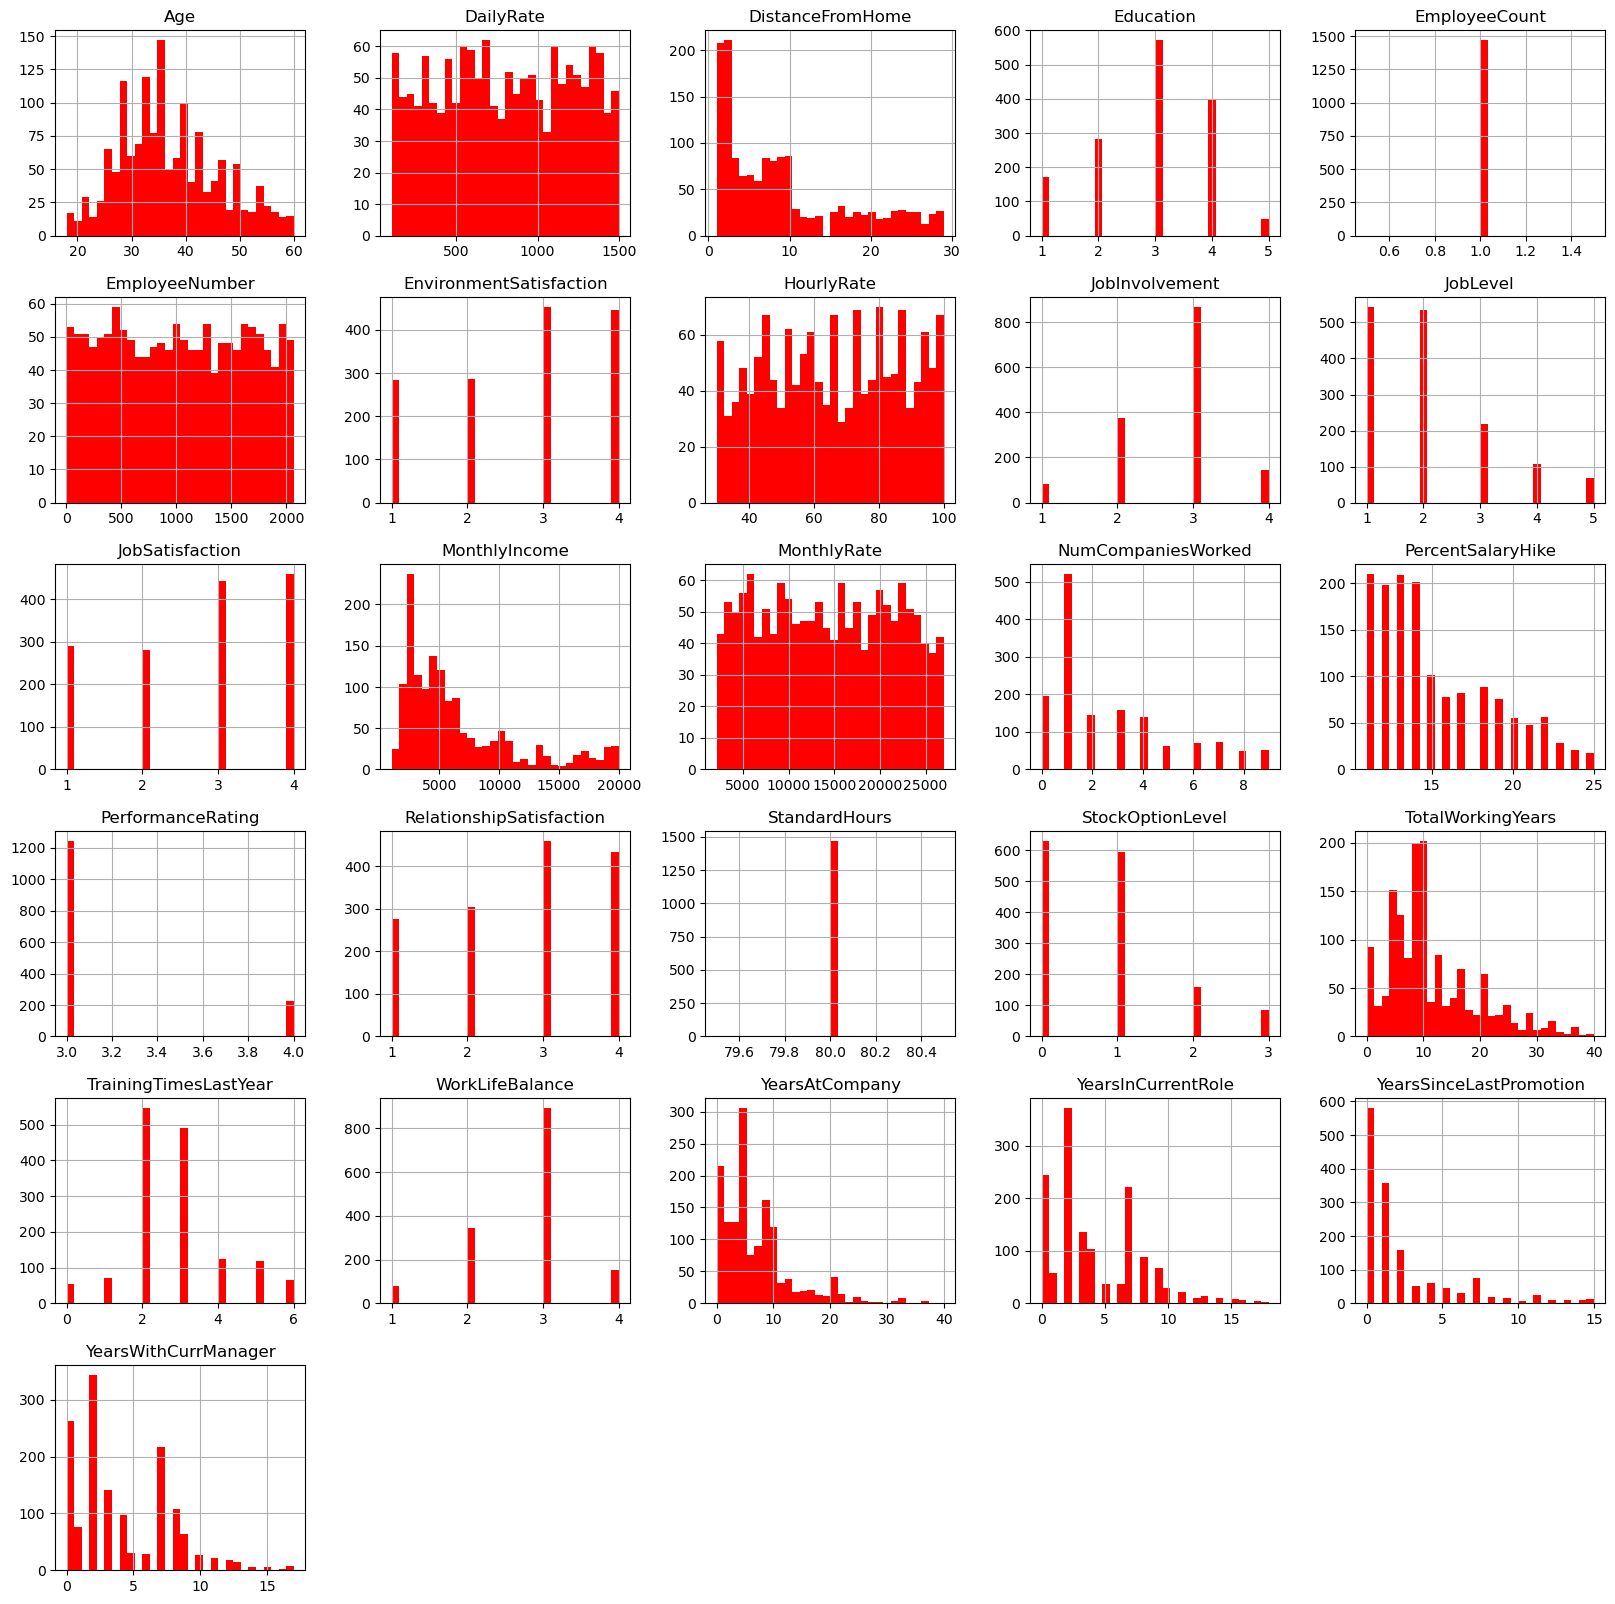

In [5]:
rh.select('*').toPandas().hist(bins = 30, figsize=(20,20), color = 'r');

# Visualização dos dados

In [6]:
#from pyspark.sql.functions import col,when
rh = rh.withColumn("Attrition", when(col("Attrition")=="Yes" ,1).otherwise(0))
rh = rh.withColumn("OverTime", when(col("OverTime")=="Yes" ,1).otherwise(0))
rh = rh.withColumn("Over18", when(col("Over18")=="Y" ,1).otherwise(0))

In [7]:
rh.select('Attrition', 'OverTime', 'Over18').show(3,truncate=False)

+---------+--------+------+
|Attrition|OverTime|Over18|
+---------+--------+------+
|1        |1       |1     |
|0        |0       |1     |
|1        |1       |1     |
+---------+--------+------+
only showing top 3 rows



In [8]:
rh = rh.drop(*('EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber')) 

In [9]:
rh.groupBy ('Attrition').count ().show ()

+---------+-----+
|Attrition|count|
+---------+-----+
|        1|  237|
|        0| 1233|
+---------+-----+



In [10]:
saiu_df = rh.filter(rh.Attrition == 1)
ficou_df = rh.filter(rh.Attrition == 0)

In [11]:
print('Total = ', rh.count())
print('Número de funcionários que saíram da empresa = ', saiu_df.count())
print('Porcentagem de funcionários que saíram da empresa = ', saiu_df.count() / rh.count() * 100)
print('Número de funcionários que ficaram na empresa = ', ficou_df.count())
print('Porcentagem de funcionários que ficaram na empresa = ', ficou_df.count() / rh.count() * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [12]:
pandas_df_saiu = saiu_df.toPandas()

In [13]:
pandas_df_saiu.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
pandas_df_ficou = ficou_df.toPandas()

In [15]:
pandas_df_ficou.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [16]:
pandas_rh_df = rh.toPandas()

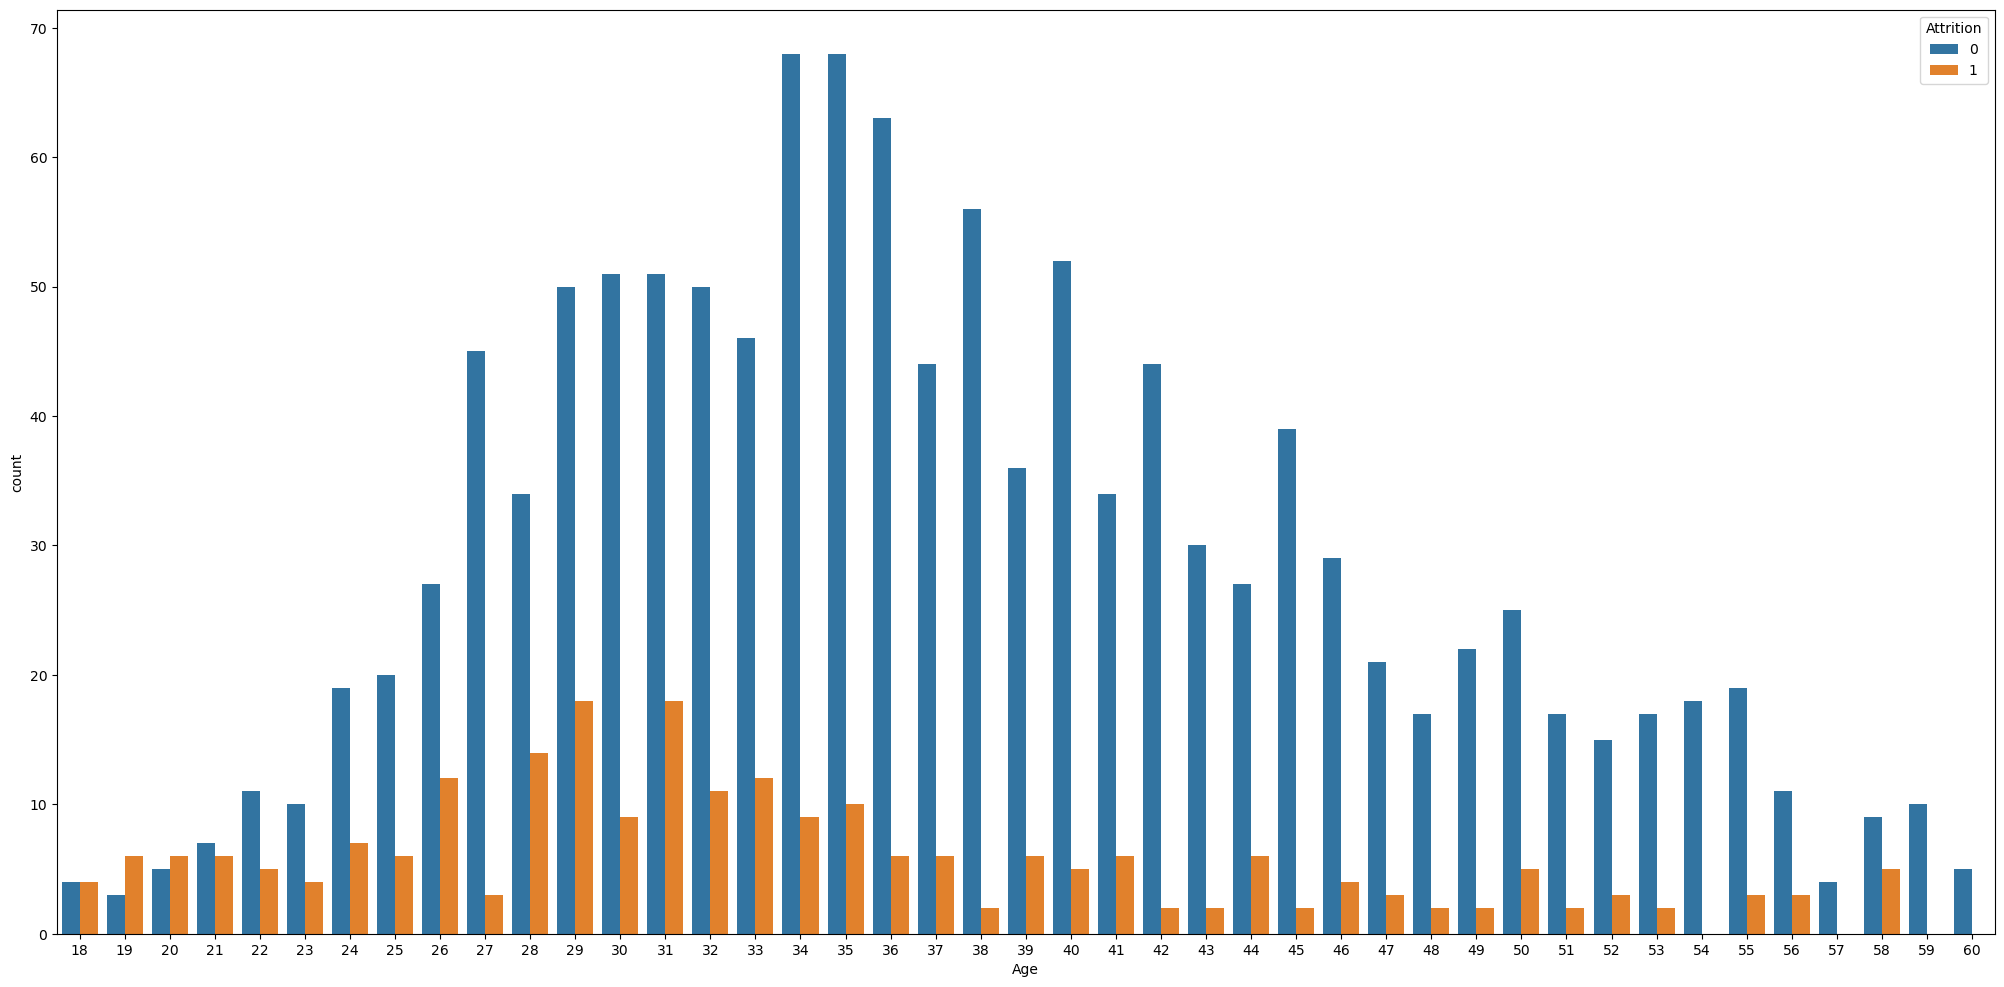

In [17]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=pandas_rh_df);

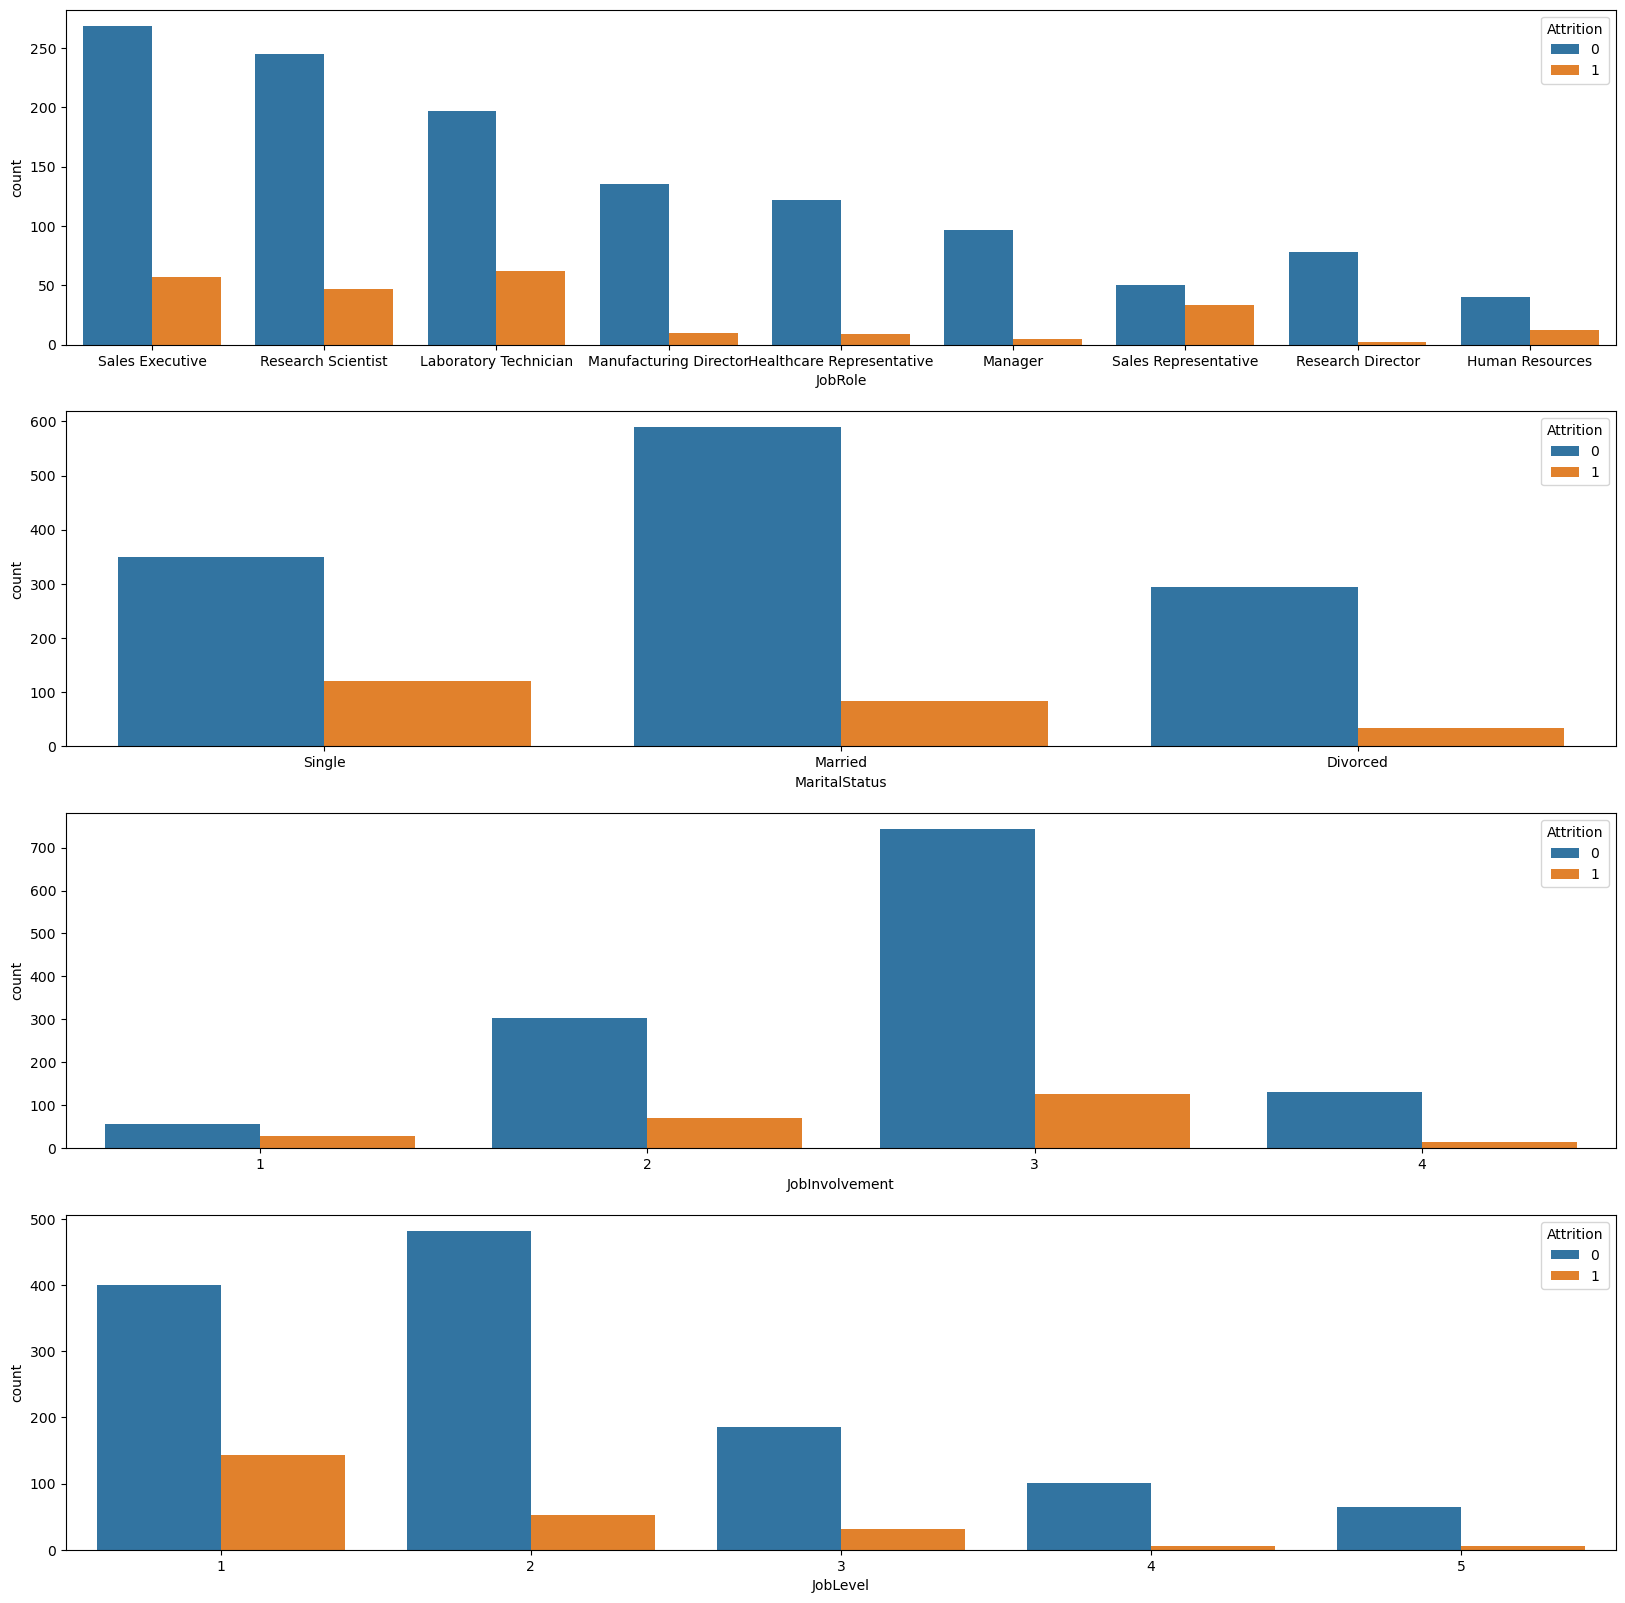

In [18]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = pandas_rh_df);
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = pandas_rh_df);
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = pandas_rh_df);
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = pandas_rh_df);

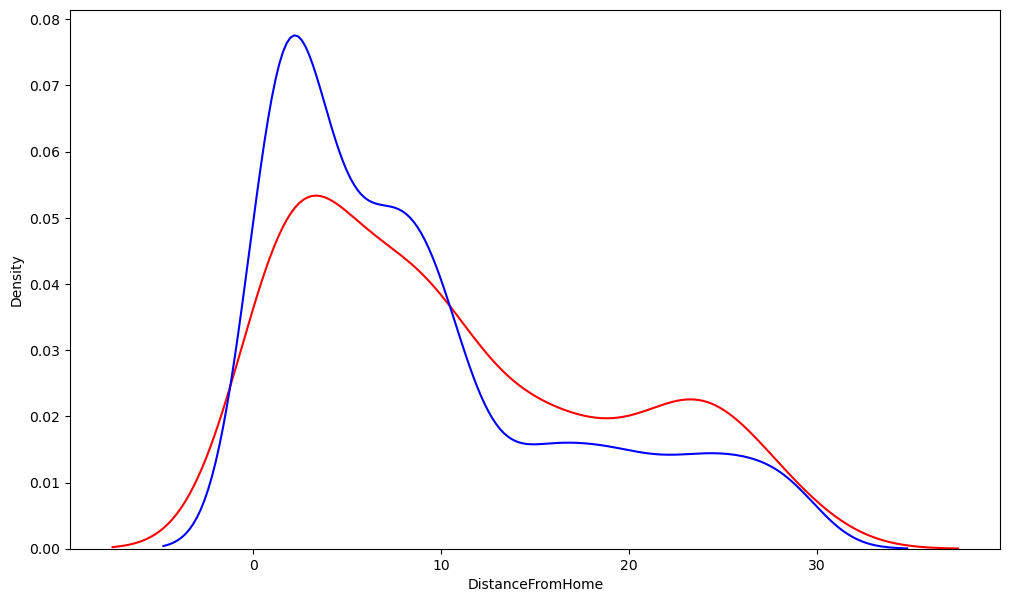

In [19]:
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(pandas_df_saiu['DistanceFromHome'], label = 'Funcionários que saíram',  color = 'r');
sns.kdeplot(pandas_df_ficou['DistanceFromHome'], label = 'Funcionários que ficaram',  color = 'b');

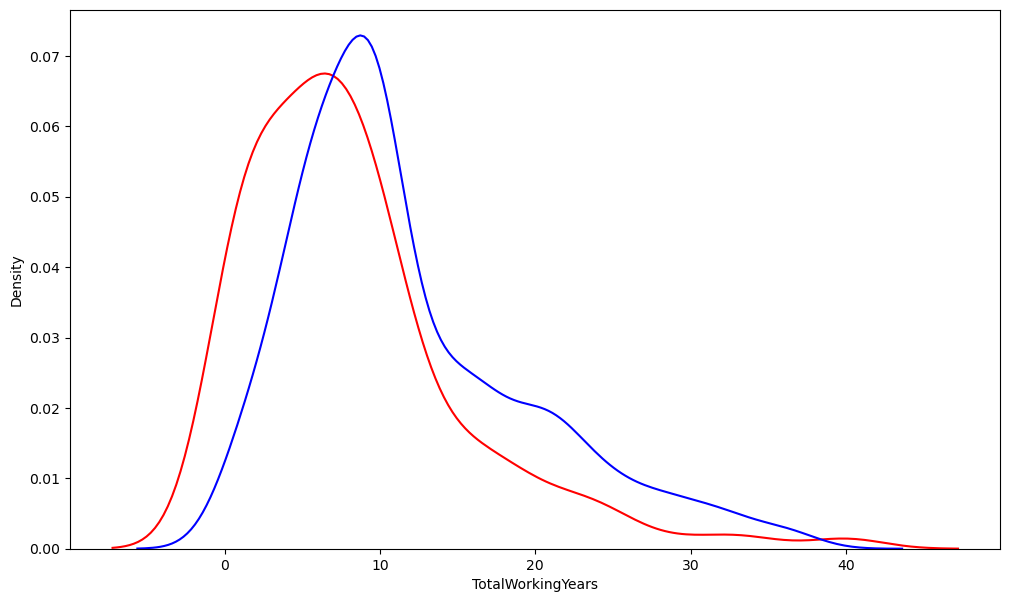

In [20]:
plt.figure(figsize=(12,7))
sns.kdeplot(pandas_df_saiu['TotalWorkingYears'], label = 'Funcionários que saíram',  color = 'r')
sns.kdeplot(pandas_df_ficou['TotalWorkingYears'], label = 'Funcionários que ficaram',  color = 'b');

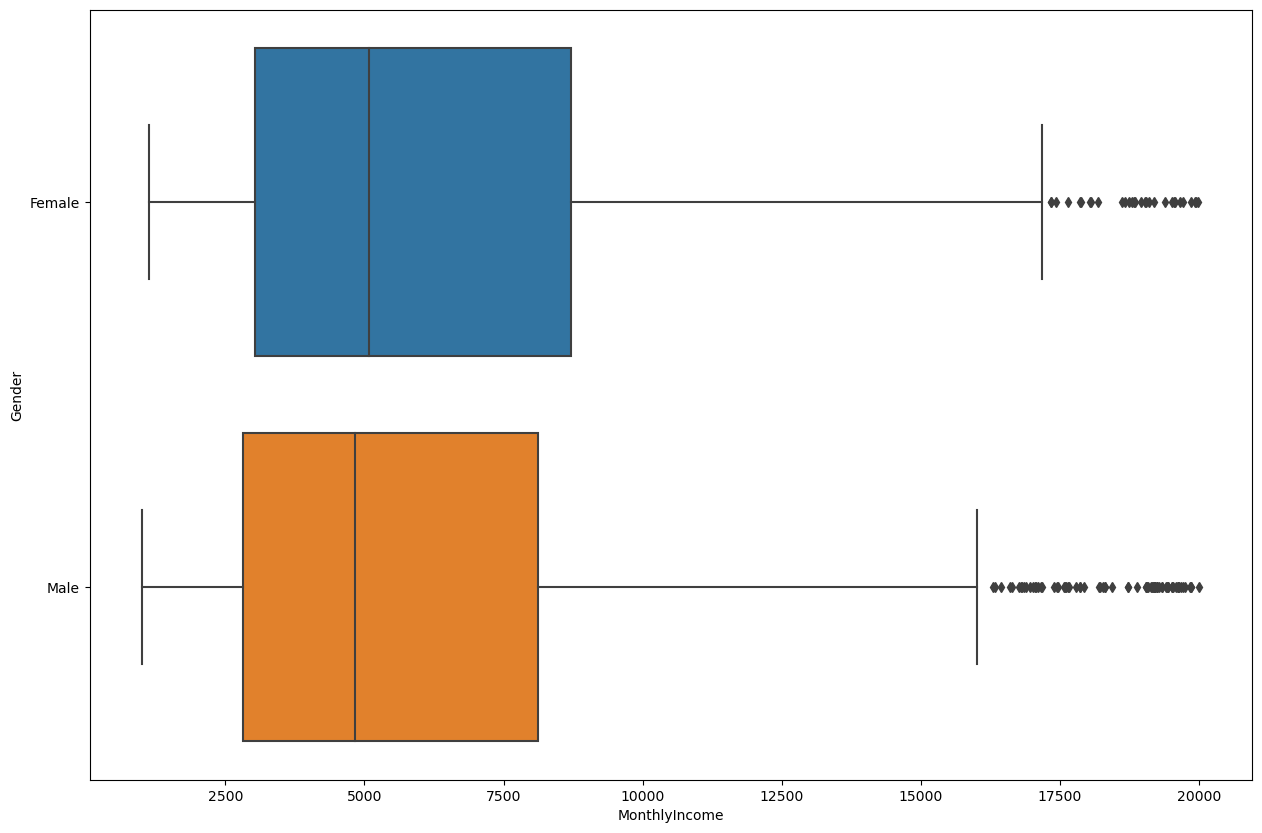

In [21]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=pandas_rh_df);

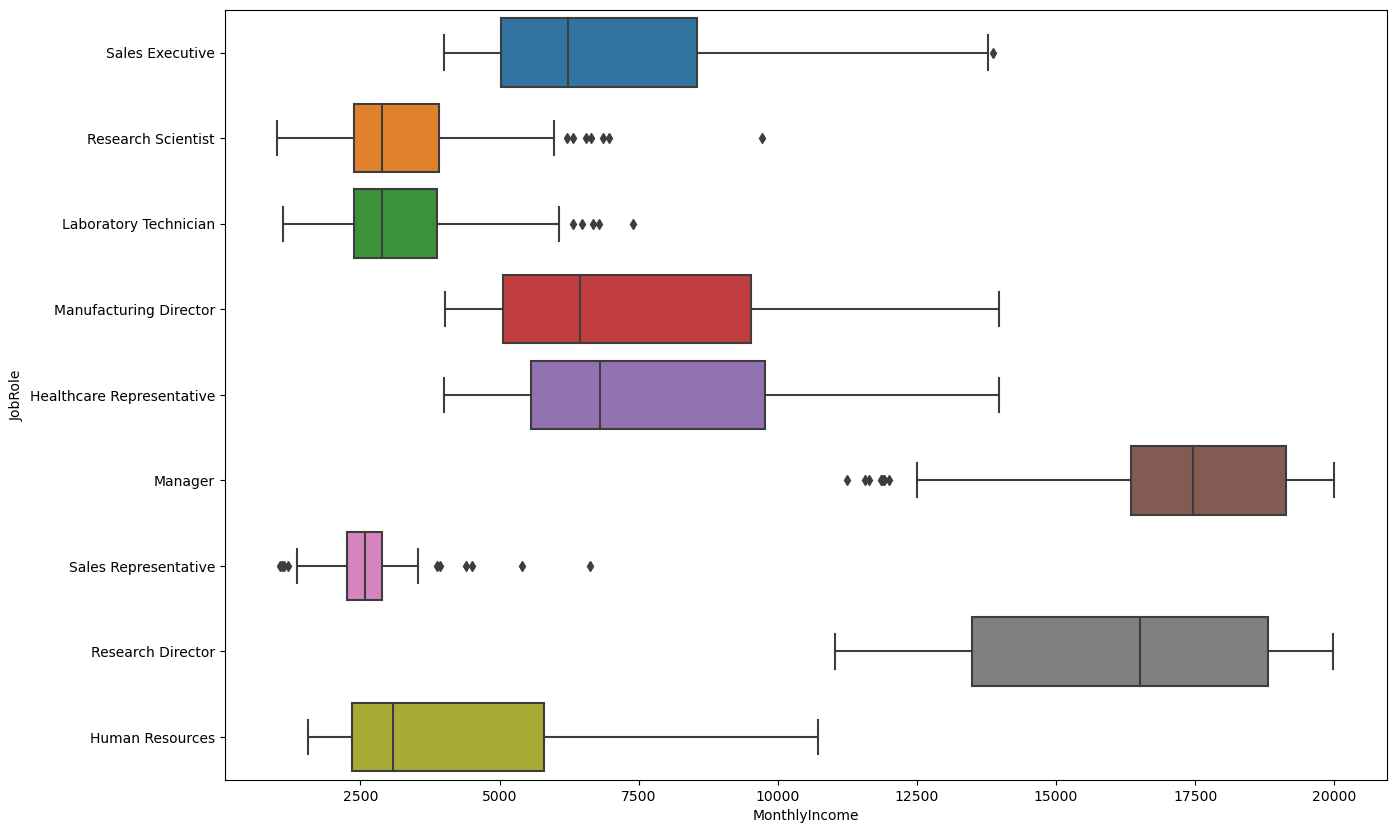

In [22]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=pandas_rh_df);

# Pré-processamento e bases de treinamento/teste

In [23]:
def get_dummy(df,categoricalCols,continuousCols,labelCol):

    from pyspark.ml import Pipeline
    from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
    from pyspark.sql.functions import col

    indexers = [ StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
                 for c in categoricalCols ]

    # default setting: dropLast=True
    encoders = [ OneHotEncoder(inputCol=indexer.getOutputCol(),
                 outputCol="{0}_encoded".format(indexer.getOutputCol()))
                 for indexer in indexers ]

    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
                                + continuousCols, outputCol="features")
    
    escala = MinMaxScaler(inputCol="features", outputCol="minmaxscale", min=0, max=1)
    
    pipeline = Pipeline(stages=indexers + encoders + [assembler]  + [escala])

    model=pipeline.fit(df)
    data = model.transform(df)

    data = data.withColumn('label',col(labelCol))

    return data.select('minmaxscale','label')

In [24]:
catcols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
num_cols = ['Age', 'DailyRate','DistanceFromHome','Education', 'EnvironmentSatisfaction',
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
labelCol = 'Attrition'

In [25]:
data = get_dummy(rh,catcols,num_cols,labelCol)
#data.show(3, truncate=False)

In [26]:
# Split the data into training and test sets (40% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

## Regressão Logistica

In [27]:
logr = LogisticRegression(featuresCol='minmaxscale', labelCol='label')
pipeline = Pipeline(stages=[logr])

In [28]:
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [29]:
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.show(3)

+--------------------+-----+--------------------+--------------------+----------+
|         minmaxscale|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(44,[0,2,4,9,11,1...|    0|[2.03414675732542...|[0.88433590923806...|       0.0|
|(44,[0,2,4,9,11,1...|    0|[0.81560457404526...|[0.69330251742745...|       0.0|
|(44,[0,2,4,9,11,1...|    1|[1.28183766111984...|[0.78276242463466...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 3 rows



In [30]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print('Accuracy = %g' % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.903153
Test Error = 0.0968468


In [31]:
lrModel = model.stages[0]
trainingSummary = lrModel.summary

In [32]:
trainingSummary.roc.show(5, truncate = False);
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

+---+--------------------+
|FPR|TPR                 |
+---+--------------------+
|0.0|0.0                 |
|0.0|0.005813953488372093|
|0.0|0.011627906976744186|
|0.0|0.01744186046511628 |
|0.0|0.023255813953488372|
+---+--------------------+
only showing top 5 rows

areaUnderROC: 0.8640460759217888


# Randon Forest

In [33]:
randomforest = RandomForestClassifier(labelCol="label", featuresCol="minmaxscale", 
                                      maxDepth=10, numTrees=500, seed = 20)
pipeline = Pipeline(stages=[randomforest])

In [34]:
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [35]:
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|         minmaxscale|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(44,[0,2,4,9,11,1...|    0|[370.829460692506...|[0.74165892138501...|       0.0|
|(44,[0,2,4,9,11,1...|    0|[431.182078950038...|[0.86236415790007...|       0.0|
|(44,[0,2,4,9,11,1...|    1|[342.160280506574...|[0.68432056101314...|       0.0|
|(44,[0,2,4,9,11,1...|    0|[470.210653470581...|[0.94042130694116...|       0.0|
|(44,[0,2,4,9,11,1...|    0|[363.424372429183...|[0.72684874485836...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [36]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print('Accuracy = %g' % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.867117
Test Error = 0.132883


In [37]:
lrModel = model.stages[0]
trainingSummary = lrModel.summary

In [38]:
trainingSummary.roc.show(5, truncate = False);
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

+---+--------------------+
|FPR|TPR                 |
+---+--------------------+
|0.0|0.0                 |
|0.0|0.005813953488372093|
|0.0|0.011627906976744186|
|0.0|0.01744186046511628 |
|0.0|0.023255813953488372|
+---+--------------------+
only showing top 5 rows

areaUnderROC: 0.9999931920919339


## Gradient-Boosted

In [39]:
gbt = GBTClassifier(labelCol="label", featuresCol="minmaxscale")
pipeline = Pipeline(stages=[gbt])

In [40]:
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

In [41]:
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|         minmaxscale|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(44,[0,2,4,9,11,1...|    0|[0.80557615398472...|[0.83357130777196...|       0.0|
|(44,[0,2,4,9,11,1...|    0|[1.22179744346743...|[0.92009179375442...|       0.0|
|(44,[0,2,4,9,11,1...|    1|[-1.2736779772254...|[0.07260431563135...|       1.0|
|(44,[0,2,4,9,11,1...|    0|[1.29540131920759...|[0.93026730230116...|       0.0|
|(44,[0,2,4,9,11,1...|    0|[-0.4591846947844...|[0.28529025888373...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [42]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print('Accuracy = %g' % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.86036
Test Error = 0.13964
